In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df= pd.read_csv("gapminder_all.csv")
print(df.groupby('fertility')['life'].head())

0      75.3
1      58.3
2      75.5
3      72.5
4      81.5
       ... 
134    76.0
135    68.7
136    75.4
137    52.0
138    49.0
Name: life, Length: 139, dtype: float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            139 non-null    int64  
 1   population       139 non-null    int64  
 2   fertility        139 non-null    float64
 3   HIV              139 non-null    float64
 4   CO2              139 non-null    float64
 5   BMI_male         139 non-null    float64
 6   GDP              139 non-null    int64  
 7   BMI_female       139 non-null    float64
 8   life             139 non-null    float64
 9   child_mortality  139 non-null    float64
 10  Region           139 non-null    object 
dtypes: float64(7), int64(3), object(1)
memory usage: 12.1+ KB


In [6]:
df.describe()

,index,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,139.000000,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,69.000000,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,40.269923,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,0.000000,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,34.500000,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,69.000000,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,103.500000,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,138.000000,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [7]:
df.head()

,index,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


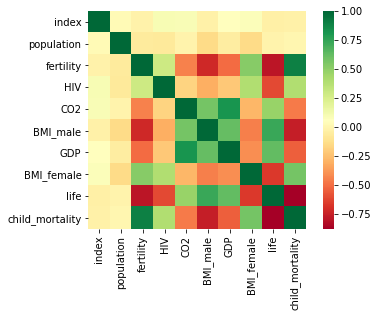

In [90]:
sns.heatmap(df.corr(),square= True , cmap= "RdYlGn")

In [280]:
# X=df["fertility"].values
# print(fer_boxcox)
X=fer_boxcox
y=df['life'].values

In [281]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [282]:
# import library
from sklearn.linear_model import LinearRegression

In [283]:
#create reg
reg = LinearRegression()

In [284]:

prediction_space= np.linspace (min(X),max(X),100).reshape(-1,1)
# print(prediction_space)
prediction_space.shape

(100, 1)

In [285]:
# print(X)
X.shape
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [286]:
y_pred= reg.predict(X)
reg.predict([[3],[2]])
# array([[69.62557665],
#        [74.06945564]])

array([[17.1554006 ],
       [40.30675547]])

In [287]:
#print R2
print(reg.score(X,y))

0.6029627497734289


In [288]:
# print(X)
# print(y)
# print(y_pred)

<function matplotlib.pyplot.show(*args, **kw)>

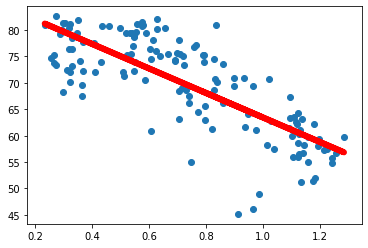

In [289]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red', linewidth=6)
plt.show

In [102]:

import pickle 
  


In [129]:
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(reg) 
  
# Load the pickled model 
reg_from_pickle = pickle.loads(saved_model) 
m=[[6.43],[3]]
# s=m.reshape(-1,1)
# Use the loaded pickled model to make predictions
reg_from_pickle.predict(m) 
# reg_from_pickle.predict([[10]]) 

array([[54.38307171],
       [69.62557665]])

In [104]:
df.loc[:, 'fertility'].head(n=3)

0    2.73
1    6.43
2    2.24
Name: fertility, dtype: float64

In [175]:
print(df.groupby('fertility'))
df.groupby('fertility')['life']

In [191]:
a=reg.intercept_.round(2)
m=reg.coef_.round(2)
print("y=",m[0,0],"x+",a)

y= -4.44 x+ [82.96]


In [121]:
df = pd.read_csv('gapminder_all.csv',index_col='fertility')

In [128]:
df.loc[6.43,'life'] #just in index column

58.3

In [182]:
input_fertility=0
mm=[[input_fertility]]
# s=m.reshape(-1,1)
# Use the loaded pickled model to make predictions
D=reg_from_pickle.predict(mm)
print('The predicted life value for this fertility is=',D[0,0])

try:
    real_data=df.loc[input_fertility,'life']
    print('The real life value for this fertility is=',max(real_data))
    error= abs((D[0,0]-max(real_data))/max(real_data))*100
    print('The error occured for this value is=',error,'%')
except:
    print('There is not any life value available for this specific ferility=', input_fertility)

The predicted life value for this fertility is= 82.95721361742582
There is not any life value available for this specific ferility= 0


In [200]:
from sklearn.model_selection import train_test_split
Y=y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
reg2 = LinearRegression()
reg2.fit(X_train, Y_train)
y_test_predicted = reg2.predict(X_test)

y= -4.96 x+ [84.58]


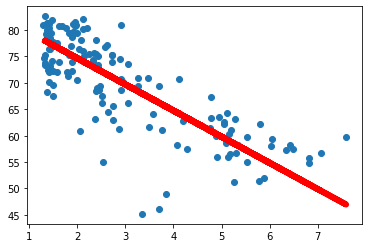

In [206]:
plt.scatter(X,y)
plt.plot(X_test, y_test_predicted, color='red', linewidth=6)
plt.show
a2=reg2.intercept_.round(2)
m2=reg2.coef_.round(2)
print("y=",m2[0,0],"x+",a2)

In [213]:
#print R2
print(reg2.score(X,y))

0.6109530106250272


In [214]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, y_pred)

31.456396106894598

In [218]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_test_predicted)

38.5804515759027

1.0907385330938268e-05


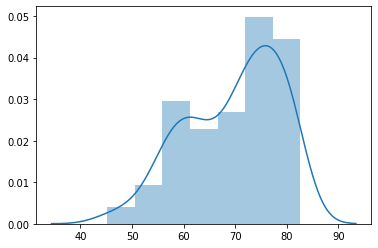

In [262]:
#skewness
#skewness
#skewness
#skewness
#skewness
#skewness
df= pd.read_csv("gapminder_all.csv")
c=[7,2,9,0,8,6,3,5,4,1]
resp=y
from scipy.stats import shapiro
print(shapiro(resp)[1])
sns.distplot(resp)
# so a p-value less than 0.05 indicates significant skewness.

In [249]:
#another method for getting skewness
#determine index for continuous variables
num_feats=df.dtypes[df.dtypes != 'object']. index
#calculate skew and sort
skew_feats=df[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
print(skewness)
# a value near than 0 indicates no skewness.
df['fertility'].skew()

                     Skew
population       8.981542
HIV              3.918526
CO2              3.628596
GDP              2.358662
child_mortality  1.156400
fertility        0.967394
index            0.000000
BMI_female      -0.080250
BMI_male        -0.255106
life            -0.548382


0.9673942369047374

In [263]:
#  address skewed variables by transforming them
# 1-square root (sqrt(x)), 2-logarithmic (log(x)), and 3- reciprocal (1/x) 4-boxcox
# sqrt_resp = resp**(0.5)
# sns.distplot(sqrt_resp)
fer_sqrt=np.sqrt(df['fertility'])
fer_sqrt.skew()

0.6831771692132594

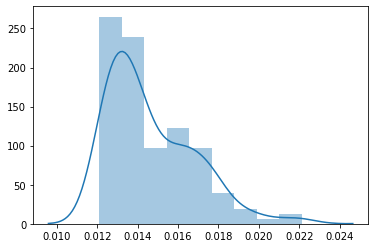

In [241]:
recip=1/resp
sns.distplot(recip)

In [266]:
# log_resp=np.log(resp)
# sns.distplot(log_resp)
fer_log=np.log(df['fertility'])
# fer_log.skew()
fer_log.skew()

0.39130458799634044

0.10234028498348569


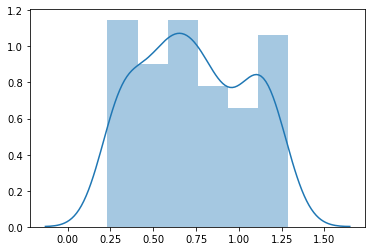

In [274]:
from scipy import stats
fer_boxcox=stats.boxcox(df['fertility'])[0]
print(pd.Series(fer_boxcox).skew())
sns.distplot(fer_boxcox)
# for i in skewed_features:
# df[i],lmbda=boxcox(df[i], lmbda= None )
